#1주차 과제
####제출: 16기 김상옥
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기


#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [13]:
#import numpy as np
X= torch.FloatTensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
Y= torch.FloatTensor([[1,2,4],[1,3,9],[1,4,16],[1,25,125]])

#행으로 병합
output1 = torch.cat([X,Y], dim=0)
print(output1)

#열로 병합
output2 = torch.cat([X,Y], dim=1)
print(output2)

tensor([[  1.,   2.,   3.],
        [  4.,   5.,   6.],
        [  7.,   8.,   9.],
        [ 10.,  11.,  12.],
        [  1.,   2.,   4.],
        [  1.,   3.,   9.],
        [  1.,   4.,  16.],
        [  1.,  25., 125.]])
tensor([[  1.,   2.,   3.,   1.,   2.,   4.],
        [  4.,   5.,   6.,   1.,   3.,   9.],
        [  7.,   8.,   9.,   1.,   4.,  16.],
        [ 10.,  11.,  12.,   1.,  25., 125.]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [13]:
#matplotlib 관련 버전 에러가 발생하는 것으로 파악되어 특정 버전으로 고정
!pip install d2l==1.0.0b0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 15.6 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616821 sha256=3ed4be1d109e23bbc19eed668f3827b15207298757909a51494408a7996c074a
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
  Attempting uninstall: d2l
    Found existing installation: d2l 0.17.6
    Uninstalling d2l-0.17.6:
      Successfull

In [8]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [123]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [124]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.9303, -0.8585]) 
label: tensor([1.0097])


In [125]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [126]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.1790, -0.3782],
        [-0.3496,  0.1686],
        [-0.8995,  0.3374],
        [-0.9603,  0.2757],
        [-0.4293,  0.6303],
        [-0.4921, -0.7416],
        [-0.7071,  1.4855],
        [ 2.2037, -0.2397],
        [-0.3893,  2.0223],
        [-0.4784,  0.4581],
        [-1.0492,  1.1788],
        [-1.3099,  0.0383],
        [ 0.1275, -0.7106],
        [-0.5713, -1.0859],
        [ 0.1960, -0.5174],
        [ 1.5643,  2.1778],
        [ 0.5595,  0.4298],
        [-1.4489,  0.4285],
        [-0.7673,  0.5365],
        [-0.8560, -0.7634]]) 
 tensor([[ 2.5047],
        [ 4.2010],
        [ 2.2957],
        [ 2.2018],
        [ 3.2692],
        [ 5.1429],
        [ 1.1604],
        [12.4830],
        [ 1.2909],
        [ 3.3876],
        [ 0.5899],
        [ 1.5173],
        [ 6.9411],
        [ 5.4161],
        [ 6.8557],
        [ 6.9186],
        [ 6.5197],
        [ 0.5156],
        [ 2.3970],
        [ 4.0741]])


In [127]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
#requires_grad=True 빼먹을 시 에러 발생
b = torch.tensor([2.0], requires_grad=True) #원하는 실수를 넣어주세요(소숫점 빼먹으면 정수로 인식)

In [128]:
def linreg(X, w, b):
    """The linear regression model."""
    ###lr func 코드 완성하기 
    return torch.matmul(X, w) + b

In [129]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    ###loss function 직접 짜보기
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 

In [130]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        ###반복문으로 채워넣기
        for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_()


In [131]:
lr = 0.02 ###직접 설정
num_epochs = 4 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) ###채워넣기), ###채워넣기) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) ###채워넣기) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.217752
epoch 2, loss 0.004241
epoch 3, loss 0.000135
epoch 4, loss 0.000054


In [132]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0012, -0.0009], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0015], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

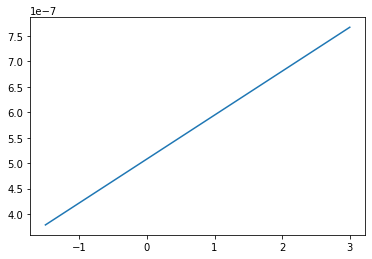

In [134]:
#잘못 그린 것 같은데... 해설 부탁드립니다ㅠ
import matplotlib.pyplot as plt
plt.plot(w.cpu().detach().numpy(), squared_loss(w, true_w).cpu().detach().numpy())

concise implementation of linear regression 
- api 사용해보기

In [135]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [136]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [137]:
next(iter(data_iter))

[tensor([[ 0.4149, -0.7489],
         [ 1.1503,  0.8202],
         [ 0.9275,  0.5781],
         [-0.2598,  0.1440],
         [-1.2772, -0.0463],
         [-1.7864,  1.4244],
         [-0.0871, -0.6331],
         [ 1.1903,  0.3260],
         [ 0.0357, -0.2490],
         [-0.6076,  0.7809],
         [ 0.2532, -0.0560],
         [ 0.1281,  0.2178],
         [ 0.3519,  1.0386],
         [-1.1364,  0.0417],
         [ 0.4134, -0.5777],
         [ 0.2000,  0.5652],
         [-0.2648,  2.2569],
         [-0.2392, -0.8368],
         [-1.8279,  0.6420],
         [-0.6773, -0.7065]]), tensor([[ 7.8799],
         [ 7.7146],
         [ 7.4284],
         [ 4.4986],
         [ 1.7491],
         [-2.0067],
         [ 6.1917],
         [ 8.5964],
         [ 5.9978],
         [ 2.5111],
         [ 6.3335],
         [ 5.5553],
         [ 5.0041],
         [ 2.0183],
         [ 7.5983],
         [ 5.2555],
         [ 1.3095],
         [ 6.0400],
         [-0.9616],
         [ 4.5370]])]

In [138]:
from torch import nn

net = nn.Sequential((nn.Linear(2, 1))) ###채워넣기)

In [139]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [140]:
loss = nn.MSELoss() ###api function으로 직접 설정

In [141]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03) ###api function으로 직접 설정

In [142]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y) ###직접설정)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000274
epoch 2, loss 0.000100
epoch 3, loss 0.000100


In [143]:
w = net[0].weight.data ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0003,  0.0007])
error in estimating b: tensor([-0.0002])
